# Cluster Analysis

(using K-Means)

### Load the datasets.

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans
from sklearn.cluster import KMeans

# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

In [2]:
# import analytical base table
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

# import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

In [3]:
base_df.head()

,total_transactions,total_product,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [4]:
threshold_item_data.head()


,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [5]:
pca_item_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876137,4.828935,-0.495577,3.093811,-0.633736,-11.534198,2.161967,7.117038,5.336056,4.424549,4.637062,2.316710,12.311318,1.986851,-11.431047,5.618190,-2.177431,7.665981,-12.135738,-16.048723,-5.950295,7.813044,40.519614,-35.572918,-17.556976,6.869776,20.886647,2.296049,-26.163258,-32.577127,7.884097,12.356906,6.827739,-32.957991,-4.404379,-17.239738,-11.273255,-14.486988,-2.767362,4.735348,-6.985956,-1.462022,10.600264,1.238150,3.087728,5.337732,-0.413105,1.642647,-6.377244,3.074984,...,2.259384,2.514024,-0.949739,-1.756908,-1.893745,1.233983,0.529387,-1.294778,-2.152056,-3.482475,0.625572,-1.858445,0.665898,0.166590,1.149645,-1.827166,0.888027,0.409064,-0.367233,0.628479,-0.418556,-0.506453,0.027745,0.511525,-0.594990,-0.065224,1.184804,-0.669911,0.480065,-0.471834,0.352140,-0.750540,0.841184,0.730884,0.546927,0.485050,0.034618,-0.552985,0.350006,0.119397,0.800358,-0.465597,0.241071,-0.241904,0.222686,0.231430,0.455689,-0.401345,0.315547,-0.283115
12348,-4.219835,1.226222,-1.881847,-0.174291,0.817895,1.160775,-0.871611,-0.846863,0.460280,0.854325,-0.402000,0.981261,-1.104545,0.770006,-0.093126,-0.311915,-0.448806,1.207725,0.381306,-0.470859,0.187144,0.055000,0.499080,0.375380,1.226666,-0.773619,-0.272734,0.849919,-0.368749,-0.574340,1.011546,-0.577675,0.946590,-0.732688,0.355845,-0.383868,-0.297736,0.396369,0.158836,0.325836,-0.462349,0.699398,1.202520,-0.198906,-0.879278,-0.068951,-0.420124,-1.622069,-0.408993,0.458619,...,-0.987455,-0.861169,-0.422910,-0.435498,-0.137144,0.114570,-0.819584,-0.537938,0.713872,0.053352,0.284297,0.223282,-1.989738,-0.040525,-0.273965,-0.648757,-0.013423,0.816600,-0.690712,1.333890,-0.605698,0.085182,0.480599,1.489482,-0.174938,1.274056,-0.914448,-1.784455,-1.226970,-0.798389,1.146362,-0.672842,-0.903367,-1.062032,-1.517157,-0.792148,0.596656,-1.227578,-0.713006,0.425738,-2.190248,-0.251298,-0.682795,0.119773,-1.982126,-0.809825,-0.075804,-0.908797,-0.331597,0.502027
12349,-1.260832,2.387599,-0.073159,-1.118673,-0.034548,-3.715747,-0.343564,-0.148809,-0.790531,-0.379522,1.570410,0.183230,0.225685,-0.052077,3.179025,-0.513485,-1.839342,0.385649,0.321762,-0.005731,-0.422840,0.451726,-0.789155,1.752829,-1.476441,0.758949,-0.923066,0.767186,0.516383,-1.354502,0.284891,0.668260,0.084869,-0.209815,-0.681481,-1.563345,0.800852,-1.424388,-0.083935,-0.934829,0.078046,-0.085347,-0.135403,0.685941,1.385980,-0.228021,-0.062030,-0.184684,0.828004,1.708567,...,2.386858,-0.654530,1.617757,0.555128,1.273394,0.075853,-0.996345,0.973068,1.080983,-0.535622,2.046849,1.360743,-2.222754,-2.957794,0.144744,-2.222371,-1.597729,-2.341312,-1.968631,-1.119935,-0.206926,0.922232,0.559826,-0.530844,2.446865,-0.196279,0.011281,2.098077,2.911387,-2.481103,1.250599,-0.751900,-2.289395,-1.499979,-0.259309,-0.538619,1.778280,0.604381,2.079673,-0.000661,5.436085,1.361169,0.339340,0.112495,2.700313,0.906261,-3.134710,3.084243,2.965877,1.741108
12350,-4.929324,-0.714818,-1.580918,-0.469757,-0.116400,0.647786,0.112789,-1.336410,1.546931,-1.190005,-0.213314,1.057437,-0.474650,0.856876,-1.305207,0.242200,0.268306,1.952809,-0.227722,0.570351,-0.188725,0.903127,1.363858,0.178578,-0.260697,-0.167381,-0.683990,1.080464,-0.155701,-0.395501,0.243831,0.632601,-1.446474,-0.186183,-0.313199,-0.303362,-1.357424,-0.003413,0.583971,-0.250514,0.582831,-0.223642,0.282042,0.519986,-0.524252,-0.099877,-1.468281,0.125034,

In [6]:
# shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)


(414, 8)
(414, 20)
(414, 125)


### Join the data

Join base data with the ff:
* threshold item data
* pca itam data


In [7]:
# join with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# first 5 rows of threshold_df
print(threshold_df.shape)
threshold_df.head()


(414, 28)


,total_transactions,total_product,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [8]:
# join with pca_item_data
pca_df = base_df.join(pca_item_data)

# first 5 rows of pca_df
print(pca_df.shape)
pca_df.head()

(414, 133)


,total_transactions,total_product,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876137,4.828935,-0.495577,3.093811,-0.633736,-11.534198,2.161967,7.117038,5.336056,4.424549,4.637062,2.316710,12.311318,1.986851,-11.431047,5.618190,-2.177431,7.665981,-12.135738,-16.048723,-5.950295,7.813044,40.519614,-35.572918,-17.556976,6.869776,20.886647,2.296049,-26.163258,-32.577127,7.884097,12.356906,6.827739,-32.957991,-4.404379,-17.239738,-11.273255,-14.486988,-2.767362,4.735348,-6.985956,-1.462022,...,2.259384,2.514024,-0.949739,-1.756908,-1.893745,1.233983,0.529387,-1.294778,-2.152056,-3.482475,0.625572,-1.858445,0.665898,0.166590,1.149645,-1.827166,0.888027,0.409064,-0.367233,0.628479,-0.418556,-0.506453,0.027745,0.511525,-0.594990,-0.065224,1.184804,-0.669911,0.480065,-0.471834,0.352140,-0.750540,0.841184,0.730884,0.546927,0.485050,0.034618,-0.552985,0.350006,0.119397,0.800358,-0.465597,0.241071,-0.241904,0.222686,0.231430,0.455689,-0.401345,0.315547,-0.283115
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219835,1.226222,-1.881847,-0.174291,0.817895,1.160775,-0.871611,-0.846863,0.460280,0.854325,-0.402000,0.981261,-1.104545,0.770006,-0.093126,-0.311915,-0.448806,1.207725,0.381306,-0.470859,0.187144,0.055000,0.499080,0.375380,1.226666,-0.773619,-0.272734,0.849919,-0.368749,-0.574340,1.011546,-0.577675,0.946590,-0.732688,0.355845,-0.383868,-0.297736,0.396369,0.158836,0.325836,-0.462349,0.699398,...,-0.987455,-0.861169,-0.422910,-0.435498,-0.137144,0.114570,-0.819584,-0.537938,0.713872,0.053352,0.284297,0.223282,-1.989738,-0.040525,-0.273965,-0.648757,-0.013423,0.816600,-0.690712,1.333890,-0.605698,0.085182,0.480599,1.489482,-0.174938,1.274056,-0.914448,-1.784455,-1.226970,-0.798389,1.146362,-0.672842,-0.903367,-1.062032,-1.517157,-0.792148,0.596656,-1.227578,-0.713006,0.425738,-2.190248,-0.251298,-0.682795,0.119773,-1.982126,-0.809825,-0.075804,-0.908797,-0.331597,0.502027
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260832,2.387599,-0.073159,-1.118673,-0.034548,-3.715747,-0.343564,-0.148809,-0.790531,-0.379522,1.570410,0.183230,0.225685,-0.052077,3.179025,-0.513485,-1.839342,0.385649,0.321762,-0.005731,-0.422840,0.451726,-0.789155,1.752829,-1.476441,0.758949,-0.923066,0.767186,0.516383,-1.354502,0.284891,0.668260,0.084869,-0.209815,-0.681481,-1.563345,0.800852,-1.424388,-0.083935,-0.934829,0.078046,-0.085347,...,2.386858,-0.654530,1.617757,0.555128,1.273394,0.075853,-0.996345,0.973068,1.080983,-0.535622,2.046849,1.360743,-2.222754,-2.957794,0.144744,-2.222371,-1.597729,-2.341312,-1.968631,-1.119935,-0.206926,0.922232,0.559826,-0.530844,2.446865,-0.196279,0.011281,2.098077,2.911387,-2.481103,1.250599,-0.751900,-2.289395,-1.499979,-0.259309,-0.538619,1.778280,0.604381,2.079673,-0.000661,5.436085,1.361169,0.339340,0.112495,2.700313,0.906261,-3.134710,3.084243,2.965877,1.741108
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929324,-0.714818,-1.580918,-0.469757,-0.116400,0.647786,0.112789,-1.336410,1.546931,-1.190005,-0.213314,1.057437,-0.474650,0.856876,-1.305207,0.242200,0.268306,1.952809,-0.227722,0.570351,-0.188725,0.903127,1.363858,0.178578,-0.260697,-0.167381,-0.683990,1.080464,-0.155701,-0.395501,0.243831,0.632601,-1.446474,-0.186183,-0.313199,-0.303362,-1.357424,-0.003413,0.583971,-0.250514,0.5828

### Base DF

* only purchase pattern features from the ABT

In [9]:
# first 5 observations of base_df
base_df.head()

,total_transactions,total_product,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [10]:
# K-Means model pipeline with 3 clusters
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [11]:
# fit K-Means pipeline
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

#### Save the cluster to base

In [12]:
base_df['cluster'] = k_means.predict(base_df)

# first 5 rows of base_df
base_df.head()

,total_transactions,total_product,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


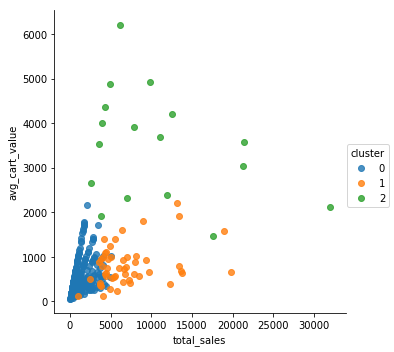

In [13]:
# scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data=base_df, fit_reg=None, hue='cluster')
plt.show()

### Threshold DF

* purchase pattern features from the ABT
* purchase counts for the top 20 items

In [14]:
# K-Means model pipeline with 3 clusters
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [15]:
# fit K-Means pipeline
k_means.fit(threshold_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

#### Save the cluster to threshold_df

In [16]:
threshold_df['cluster'] = k_means.predict(threshold_df)

# first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_product,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5,2


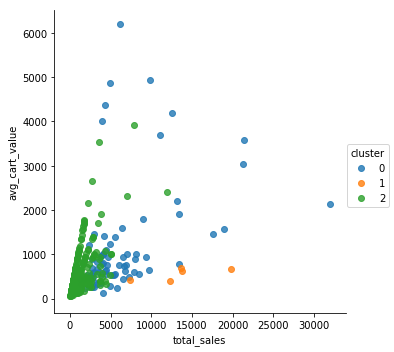

In [17]:
# scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data=threshold_df, hue='cluster', fit_reg=None)

### PCA DF

* purchase pattern features from the ABT
* first 125 principat component features from the item data

In [18]:
# K-Means model pipeline with 3 clusters
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [19]:
# fit K-Means pipeline
k_means.fit(pca_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

#### Save the cluster to pca_df

In [20]:
pca_df['cluster'] = k_means.predict(pca_df)

# first 5 rows of pca_df
pca_df.head()

,total_transactions,total_product,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876137,4.828935,-0.495577,3.093811,-0.633736,-11.534198,2.161967,7.117038,5.336056,4.424549,4.637062,2.316710,12.311318,1.986851,-11.431047,5.618190,-2.177431,7.665981,-12.135738,-16.048723,-5.950295,7.813044,40.519614,-35.572918,-17.556976,6.869776,20.886647,2.296049,-26.163258,-32.577127,7.884097,12.356906,6.827739,-32.957991,-4.404379,-17.239738,-11.273255,-14.486988,-2.767362,4.735348,-6.985956,-1.462022,...,2.514024,-0.949739,-1.756908,-1.893745,1.233983,0.529387,-1.294778,-2.152056,-3.482475,0.625572,-1.858445,0.665898,0.166590,1.149645,-1.827166,0.888027,0.409064,-0.367233,0.628479,-0.418556,-0.506453,0.027745,0.511525,-0.594990,-0.065224,1.184804,-0.669911,0.480065,-0.471834,0.352140,-0.750540,0.841184,0.730884,0.546927,0.485050,0.034618,-0.552985,0.350006,0.119397,0.800358,-0.465597,0.241071,-0.241904,0.222686,0.231430,0.455689,-0.401345,0.315547,-0.283115,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219835,1.226222,-1.881847,-0.174291,0.817895,1.160775,-0.871611,-0.846863,0.460280,0.854325,-0.402000,0.981261,-1.104545,0.770006,-0.093126,-0.311915,-0.448806,1.207725,0.381306,-0.470859,0.187144,0.055000,0.499080,0.375380,1.226666,-0.773619,-0.272734,0.849919,-0.368749,-0.574340,1.011546,-0.577675,0.946590,-0.732688,0.355845,-0.383868,-0.297736,0.396369,0.158836,0.325836,-0.462349,0.699398,...,-0.861169,-0.422910,-0.435498,-0.137144,0.114570,-0.819584,-0.537938,0.713872,0.053352,0.284297,0.223282,-1.989738,-0.040525,-0.273965,-0.648757,-0.013423,0.816600,-0.690712,1.333890,-0.605698,0.085182,0.480599,1.489482,-0.174938,1.274056,-0.914448,-1.784455,-1.226970,-0.798389,1.146362,-0.672842,-0.903367,-1.062032,-1.517157,-0.792148,0.596656,-1.227578,-0.713006,0.425738,-2.190248,-0.251298,-0.682795,0.119773,-1.982126,-0.809825,-0.075804,-0.908797,-0.331597,0.502027,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260832,2.387599,-0.073159,-1.118673,-0.034548,-3.715747,-0.343564,-0.148809,-0.790531,-0.379522,1.570410,0.183230,0.225685,-0.052077,3.179025,-0.513485,-1.839342,0.385649,0.321762,-0.005731,-0.422840,0.451726,-0.789155,1.752829,-1.476441,0.758949,-0.923066,0.767186,0.516383,-1.354502,0.284891,0.668260,0.084869,-0.209815,-0.681481,-1.563345,0.800852,-1.424388,-0.083935,-0.934829,0.078046,-0.085347,...,-0.654530,1.617757,0.555128,1.273394,0.075853,-0.996345,0.973068,1.080983,-0.535622,2.046849,1.360743,-2.222754,-2.957794,0.144744,-2.222371,-1.597729,-2.341312,-1.968631,-1.119935,-0.206926,0.922232,0.559826,-0.530844,2.446865,-0.196279,0.011281,2.098077,2.911387,-2.481103,1.250599,-0.751900,-2.289395,-1.499979,-0.259309,-0.538619,1.778280,0.604381,2.079673,-0.000661,5.436085,1.361169,0.339340,0.112495,2.700313,0.906261,-3.134710,3.084243,2.965877,1.741108,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929324,-0.714818,-1.580918,-0.469757,-0.116400,0.647786,0.112789,-1.336410,1.546931,-1.190005,-0.213314,1.057437,-0.474650,0.856876,-1.305207,0.242200,0.268306,1.952809,-0.227722,0.570351,-0.188725,0.903127,1.363858,0.178578,-0.260697,-0.167381,-0.683990,1.080464,-0.155701,-0.395501,0.243831,0.632601,-1.446474,-0.186183,-0.313199,-0.303362,-1.357424,-0.003413,0.583971,-0.250514,0.582831,-0.223642,...,-0

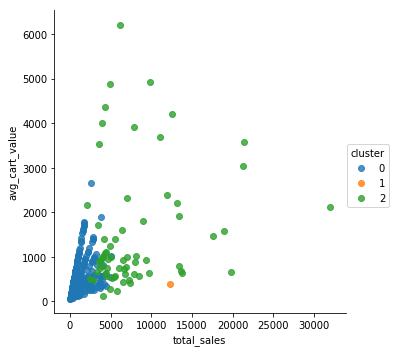

In [21]:
# scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=None)

### Model Comparison

In [22]:
# to check all indices are identical
print( all( base_df.index == threshold_df.index ) )
print( all( base_df.index == pca_df.index) )

True
True


### Rand index

(similarity measure between two clusterings)

In [23]:
# comparing base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.60213549517823428

In [24]:
# compare threshold_df.cluster and base_df.cluster
adjusted_rand_score(threshold_df.cluster,base_df.cluster)

0.60213549517823428

In [25]:
# compare base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.82169057399793832

The clusters are now created and may be used for different management actions of the company (i.e., marketing).